In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp brain.zip /content/drive/MyDrive/

In [2]:
!unzip /content/drive/MyDrive/brain.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: Brain_Tumor_Datasets/train/no/no1385.jpg  
  inflating: Brain_Tumor_Datasets/train/no/no1388.jpg  
  inflating: Brain_Tumor_Datasets/train/no/no139.jpg  
  inflating: Brain_Tumor_Datasets/train/no/no1390.jpg  
  inflating: Brain_Tumor_Datasets/train/no/no1391.jpg  
  inflating: Brain_Tumor_Datasets/train/no/no1393.jpg  
  inflating: Brain_Tumor_Datasets/train/no/no1394.jpg  
  inflating: Brain_Tumor_Datasets/train/no/no1395.jpg  
  inflating: Brain_Tumor_Datasets/train/no/no1398.jpg  
  inflating: Brain_Tumor_Datasets/train/no/no1399.jpg  
  inflating: Brain_Tumor_Datasets/train/no/no140.jpg  
  inflating: Brain_Tumor_Datasets/train/no/no1400.jpg  
  inflating: Brain_Tumor_Datasets/train/no/no1401.jpg  
  inflating: Brain_Tumor_Datasets/train/no/no1402.jpg  
  inflating: Brain_Tumor_Datasets/train/no/no1403.jpg  
  inflating: Brain_Tumor_Datasets/train/no/no1405.jpg  
  inflating: Brain_Tumor_Dat

In [3]:
import os

In [4]:
folder_path='/content/Brain_Tumor_Datasets/train/yes'
images_name=os.listdir(folder_path)
images_name[0]

'Tr-gl_0115.jpg'

In [5]:
images_path=[os.path.join(folder_path,image) for image in images_name]
images_path[0]

'/content/Brain_Tumor_Datasets/train/yes/Tr-gl_0115.jpg'

In [6]:
from PIL import Image
img=Image.open(images_path[3])
img.size

(512, 512)

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

In [8]:
transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
    ])


train_set= torchvision.datasets.ImageFolder(root='/content/Brain_Tumor_Datasets/train',transform=transform)
train_loader=torch.utils.data.DataLoader(train_set,batch_size=4,shuffle=True)

test_set= torchvision.datasets.ImageFolder(root='/content/Brain_Tumor_Datasets/test',transform=transform)
test_loader=torch.utils.data.DataLoader(test_set,batch_size=4,shuffle=True)

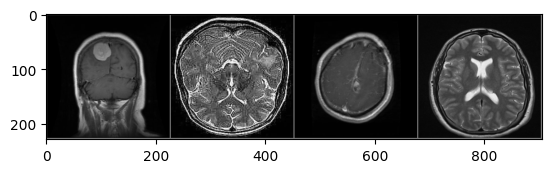

In [9]:
def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()
dataiter=iter(train_loader)
images,labels=dataiter.__next__()
imshow(torchvision.utils.make_grid(images))

In [11]:
classes = ['Yes', 'NO']

In [13]:
class ImageClassification(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 53 * 53, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [14]:
model = ImageClassification()
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.8)

In [15]:
NUM_EPOCHS = 10
for epoch in range(NUM_EPOCHS):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels.reshape(-1, 1).float())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:
            print(f'Epoch {epoch+1}/{NUM_EPOCHS}, '
                  f'Step {i+1}/{len(train_loader)}, '
                  f'Average Loss: {running_loss / 100:.4f}')
            running_loss = 0.0




Epoch 1/10, Step 100/1753, Average Loss: 0.6744
Epoch 1/10, Step 200/1753, Average Loss: 0.6107
Epoch 1/10, Step 300/1753, Average Loss: 0.4954
Epoch 1/10, Step 400/1753, Average Loss: 0.5082
Epoch 1/10, Step 500/1753, Average Loss: 0.4195
Epoch 1/10, Step 600/1753, Average Loss: 0.3834
Epoch 1/10, Step 700/1753, Average Loss: 0.3352
Epoch 1/10, Step 800/1753, Average Loss: 0.2990
Epoch 1/10, Step 900/1753, Average Loss: 0.2831
Epoch 1/10, Step 1000/1753, Average Loss: 0.2830
Epoch 1/10, Step 1100/1753, Average Loss: 0.2448
Epoch 1/10, Step 1200/1753, Average Loss: 0.2868
Epoch 1/10, Step 1300/1753, Average Loss: 0.2599
Epoch 1/10, Step 1400/1753, Average Loss: 0.2106
Epoch 1/10, Step 1500/1753, Average Loss: 0.2075
Epoch 1/10, Step 1600/1753, Average Loss: 0.2351
Epoch 1/10, Step 1700/1753, Average Loss: 0.1700
Epoch 2/10, Step 100/1753, Average Loss: 0.2016
Epoch 2/10, Step 200/1753, Average Loss: 0.1481
Epoch 2/10, Step 300/1753, Average Loss: 0.1845
Epoch 2/10, Step 400/1753, Avera

In [17]:
y_test = []
y_test_hat = []
for i, data in enumerate(test_loader, 0):
    inputs, y_test_temp = data
    with torch.no_grad():
        y_test_hat_temp = model(inputs).round()

    y_test.extend(y_test_temp.numpy())
    y_test_hat.extend(y_test_hat_temp.numpy())


In [18]:
acc = accuracy_score(y_test, y_test_hat)
print(f'Accuracy: {acc*100:.2f} %')

Accuracy: 98.63 %


In [23]:
y_test_hat[1],y_test[1]

(array([0.], dtype=float32), 0)

In [24]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_test_hat)

print("F1 Score:", f1)

F1 Score: 0.9883720930232558


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [26]:
model.eval()

ImageClassification(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=44944, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

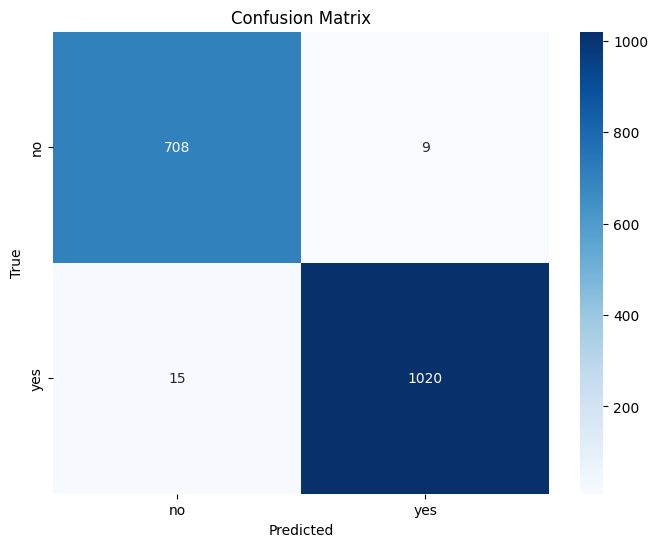

In [35]:
cm = confusion_matrix(y_test, y_test_hat)
class_names = ['no', 'yes']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [30]:
torch.save(model.state_dict(), 'BrainTumorModel')

In [31]:
image_path = '/content/5202fa5b4068653de489dd5a59d569_big_gallery.jpeg'  # Replace with the path to your input image
input_image = Image.open(image_path)


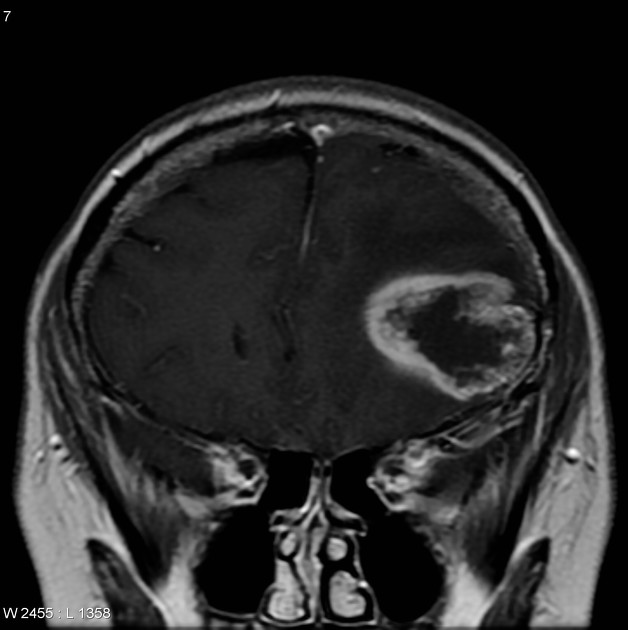

In [32]:
input_image

In [33]:
input_tensor = transform(input_image)
input_tensor = input_tensor.unsqueeze(0)

In [37]:
with torch.no_grad():
    output = model(input_tensor)
    predicted_class = int(output.round().item())
    print("Predicted Class:", class_names[predicted_class])

Predicted Class: yes
